In [ ]:
pip install Lya_zelda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Lya_zelda as Lya

your_grids_location = '/content/drive/MyDrive/Zelda/Grids'

Lya.funcs.Data_location = your_grids_location

In [ ]:
Geometry = 'Thin_Shell_Cont'

In [ ]:
LyaRT_Grid = Lya.load_Grid_Line( Geometry , MODE='LIGHT' )

Ideal Line Profile

In [ ]:
V_Value     = 50.0  # Outflow expansion velocity [km/s]

logNH_Value = 20.   # Logarithmic of the neutral hydrogen column density [cm**-2]

ta_Value    = 0.01  # Dust optical depth

logEW_Value = 1.5   # Logarithmic the intrinsic equivalent width [A]

Wi_Value    = 0.5   # Intrinsic width of the line [A]

In [ ]:
import numpy as np

w_Lya = 1215.68 # Lyman-alpha wavelength in amstrongs

wavelength_Arr = np.linspace( w_Lya-10 , w_Lya+10 , 1000 ) * 1e-10

In [ ]:
Line_Arr = Lya.RT_Line_Profile_MCMC( Geometry , wavelength_Arr , V_Value , logNH_Value , ta_Value , LyaRT_Grid , logEW_Value=logEW_Value , Wi_Value=Wi_Value )

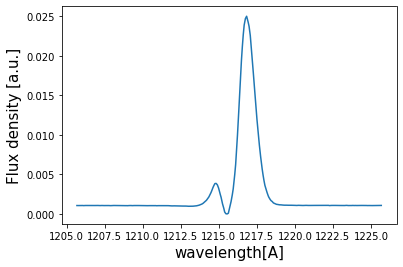

In [ ]:
import pylab as plt

plt.plot( wavelength_Arr *1e10 , Line_Arr )

plt.xlabel('wavelength[A]' , size=15 )

plt.ylabel('Flux density [a.u.]' , size=15 )

plt.show()

Computing mock Lyman Alpha profiles

In [ ]:
z_t      = 0.5   # redshift of the source

V_t      = 50.0  # Outfloe expansion velocity [km/s]

log_N_t  = 20.   # Logarithmic of the neutral hydrogen column density [cm**-2]

t_t      = 0.01  # Dust optical depth

log_EW_t = 1.5   # Logarithmic the intrinsic equivalent width [A]

W_t      = 0.5   # Intrinsic width of the line [A]

F_t      = 1.    # Total flux of the line

In [ ]:
PNR_t  = 10.0 # Signal to noise ratio of the maximum of the line.

FWHM_t = 0.5  # Full width half maximum diluting the line. Mimics finite resolution. [A]

PIX_t  = 0.2  # Wavelength binning of the line. [A]

In [ ]:
w_Arr , f_Arr , _ = Lya.Generate_a_real_line( z_t , V_t, log_N_t, t_t, F_t, log_EW_t, W_t , PNR_t, FWHM_t, PIX_t, LyaRT_Grid, Geometry )

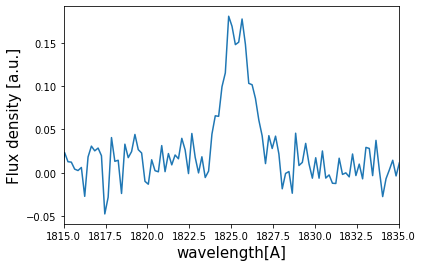

In [ ]:
import pylab as plt

plt.plot( w_Arr , f_Arr )

plt.xlabel('wavelength[A]' , size=15 )

plt.ylabel('Flux density [a.u.]' , size=15 )

plt.xlim(1815,1835)

plt.show()

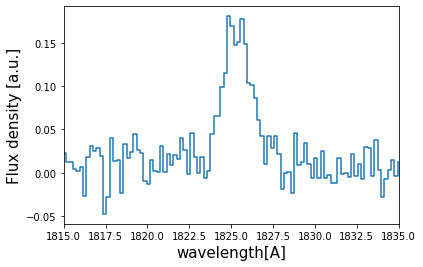

In [ ]:
w_pix_Arr , f_pix_Arr = Lya.plot_a_rebinned_line( w_Arr , f_Arr , PIX_t )

plt.plot( w_pix_Arr , f_pix_Arr )

plt.xlabel('wavelength[A]' , size=15 )

plt.ylabel('Flux density [a.u.]' , size=15 )

plt.xlim(1815,1835)

plt.show()

Fitting Line using Deep Learning

In [ ]:
# Defining the model parameters:

z_t      = 0.5   # redshift of the source

V_t      = 50.0  # Outflow expansion velocity [km/s]

log_N_t  = 20.   # Logarithmic of the neutral hydrogen column density [cm**-2]

t_t      = 0.01  # Dust optical depth

log_EW_t = 1.5   # Logarithmic the intrinsic equivalent width [A]

W_t      = 0.5   # Intrinsic width of the line [A]

F_t      = 1.    # Total flux of the line

# Defining the quality of the line profile:

PNR_t  = 15.0 # Signal to noise ratio of the maximum of the line.

FWHM_t = 0.2  # Full width half maximum diluting the line. Mimics finite resolution. [A]

PIX_t  = 0.1  # Wavelength binning of the line. [A]

w_Arr , f_Arr , s_Arr = Lya.Generate_a_real_line( z_t , V_t, log_N_t, t_t, F_t, log_EW_t, W_t , PNR_t, FWHM_t, PIX_t, LyaRT_Grid, Geometry )

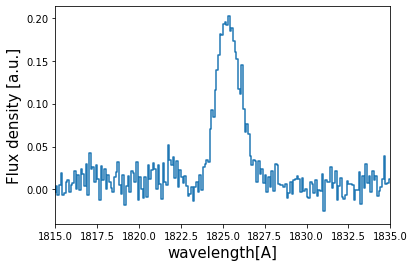

In [ ]:
w_Arr , f_Arr , s_Arr  = Lya.Generate_a_real_line( z_t , V_t, log_N_t, t_t, F_t, log_EW_t, W_t , PNR_t, FWHM_t, PIX_t, LyaRT_Grid, Geometry )

w_pix_Arr , f_pix_Arr = Lya.plot_a_rebinned_line( w_Arr , f_Arr , PIX_t )

import pylab as plt

plt.plot( w_pix_Arr , f_pix_Arr )

plt.xlabel('wavelength[A]' , size=15 )

plt.ylabel('Flux density [a.u.]' , size=15 )

plt.xlim(1815,1835)

plt.show()

In [ ]:
machine_data =  Lya.Load_NN_model( 'Outflow' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.22.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
machine    = machine_data['Machine' ]

w_rest_Arr = machine_data[ 'w_rest' ]

In [ ]:
Sol , z_sol = Lya.NN_measure( w_Arr , f_Arr , s_Arr , FWHM_t , PIX_t , machine , w_rest_Arr , N_iter=None )

In [ ]:
print( 'The measured redshift                                                     is' , z_sol    )

print( 'The measured logarithm of the expasion velocity                           is' , Sol[0,1] )

print( 'The measured logarithm of the HI column density                           is' , Sol[0,2] )

print( 'The measured logarithm of the dust optical depth                          is' , Sol[0,3] )

print( 'The measured logarithm of the intrinsic equivalent width                  is' , Sol[0,4] )

print( 'The measured logarithm of the intrinsic            width                  is' , Sol[0,5] )

print( 'The measured shift of the true Lya wavelgnth from the maximum of the line is' , Sol[0,0] )  

The measured redshift                                                     is 0.4998599194108473
The measured logarithm of the expasion velocity                           is 1.6037403480453423
The measured logarithm of the HI column density                           is 20.159180255635867
The measured logarithm of the dust optical depth                          is -0.6143229784250595
The measured logarithm of the intrinsic equivalent width                  is 2.075384926648412
The measured logarithm of the intrinsic            width                  is -0.34896800859103494
The measured shift of the true Lya wavelgnth from the maximum of the line is -1.3454995905666332


In [ ]:
PNR = 100000. # let's put infinite signal to noise in the model line

V_sol    = 10**Sol[0,1] # Expansion velocity km/s

logN_sol =     Sol[0,2] # log of HI column density cm**-2

t_sol    = 10**Sol[0,3] # dust optical depth

logE_sol =     Sol[0,4] # log intrinsic EW [A]

W_sol    = 10**Sol[0,5] # intrinsic width [A]

In [ ]:
w_One_Arr , f_One_Arr , _  = Lya.Generate_a_real_line( z_sol , V_sol, logN_sol, t_sol, F_t, logE_sol, W_sol, PNR, FWHM_t, PIX_t, LyaRT_Grid, Geometry )


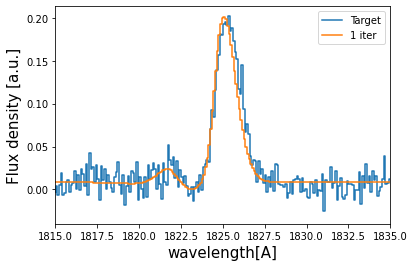

In [ ]:
w_pix_One_Arr , f_pix_One_Arr = Lya.plot_a_rebinned_line( w_One_Arr , f_One_Arr , PIX_t )

plt.plot( w_pix_Arr     , f_pix_Arr     , label='Target' )

plt.plot( w_pix_One_Arr , f_pix_One_Arr , label='1 iter' )

plt.legend(loc=0)

plt.xlabel('wavelength[A]' , size=15 )

plt.ylabel('Flux density [a.u.]' , size=15 )

plt.xlim(1815,1835)

plt.show()

Using DNN with MC

In [ ]:
Sol , z_sol , log_V_Arr , log_N_Arr , log_t_Arr , z_Arr , log_E_Arr , log_W_Arr = Lya.NN_measure( w_Arr , f_Arr , s_Arr , FWHM_t , PIX_t , machine , w_rest_Arr , N_iter=1000 )

In [ ]:
import numpy as np

# Redshitft

z_50     = np.percentile(    z_Arr , 50 )

z_16     = np.percentile(    z_Arr , 16 )

z_84     = np.percentile(    z_Arr , 84 )

# Expansion velocity

V_50     = 10 ** np.percentile( log_V_Arr , 50 )

V_16     = 10 ** np.percentile( log_V_Arr , 16 )

V_84     = 10 ** np.percentile( log_V_Arr , 84 )

# Logarithmic of HI column density

log_N_50 = np.percentile( log_N_Arr , 50 )

log_N_16 = np.percentile( log_N_Arr , 16 )

log_N_84 = np.percentile( log_N_Arr , 84 )

# Dust optical depth

t_50     = 10 ** np.percentile( log_t_Arr , 50 )

t_16     = 10 ** np.percentile( log_t_Arr , 16 )

t_84     = 10 ** np.percentile( log_t_Arr , 84 )

# Logarithmic of intrinsic equivalent width

log_E_50 = np.percentile( log_E_Arr , 50 )

log_E_16 = np.percentile( log_E_Arr , 16 )

log_E_84 = np.percentile( log_E_Arr , 84 )

# Intrinsic width

W_50     = 10 ** np.percentile( log_W_Arr , 50 )

W_16     = 10 ** np.percentile( log_W_Arr , 16 )

W_84     = 10 ** np.percentile( log_W_Arr , 84 )



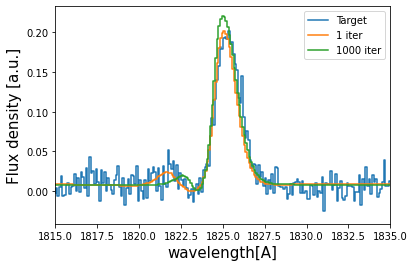

In [ ]:
# Compute the 100 iterations line profile

w_50th_Arr , f_50th_Arr , _  = Lya.Generate_a_real_line( z_50 , V_50, log_N_50, t_50, F_t, log_E_50, W_50, PNR, FWHM_t, PIX_t, LyaRT_Grid, Geometry )

# Get cooler profiles

w_pix_50th_Arr , f_pix_50th_Arr = Lya.plot_a_rebinned_line( w_50th_Arr , f_50th_Arr , PIX_t )

# Plot

plt.plot( w_pix_Arr      , f_pix_Arr      , label='Target'   )

plt.plot( w_pix_One_Arr  , f_pix_One_Arr  , label='1 iter'   )

plt.plot( w_pix_50th_Arr , f_pix_50th_Arr , label='1000 iter')

plt.legend(loc=0)

plt.xlabel('wavelength[A]' , size=15 )

plt.ylabel('Flux density [a.u.]' , size=15 )

plt.xlim(1815,1835)

plt.show()

Train your own Neural Network

In [ ]:
import numpy as np

import Lya_zelda as Lya

import pickle

from sklearn.neural_network import MLPRegressor

your_grids_location =  '/content/drive/MyDrive/Zelda/Grids'


Lya.funcs.Data_location = your_grids_location

Geometry = 'Thin_Shell_Cont'

DATA_LyaRT = Lya.load_Grid_Line( Geometry, MODE='LIGHT' )